In [1]:
import numpy as np
import  matplotlib.pyplot as plt
import h5py
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
train_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/train_catvnoncat.h5', "r")

test_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/test_catvnoncat.h5', "r")

print("File format of train_dataset:",train_dataset)
print("File format of test_dataset:",test_dataset)

File format of train_dataset: <HDF5 file "train_catvnoncat.h5" (mode r)>
File format of test_dataset: <HDF5 file "test_catvnoncat.h5" (mode r)>


In [3]:
#h5  to numpy array
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

In [4]:
train_set_x_orig.shape
test_set_x_orig.shape


(50, 64, 64, 3)

In [5]:
#test_set_x_orig

In [6]:
#Split for validation
validation_x = test_set_x_orig[:25]
validation_y = test_set_y_orig[:25]
print("Validation data shape: ",validation_x.shape)

test_set_x = test_set_x_orig[25:]
test_set_y = test_set_y_orig[25:]
print("Test data shape: ",test_set_x.shape)

Validation data shape:  (25, 64, 64, 3)
Test data shape:  (25, 64, 64, 3)


In [7]:
m_train = np.squeeze(train_set_y_orig.shape) 
m_val = np.squeeze(validation_y.shape)
m_test = np.squeeze(test_set_y.shape)
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of validation examples: m_test = " + str(m_val))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

Number of training examples: m_train = 209
Number of validation examples: m_test = 25
Number of testing examples: m_test = 25
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)


In [8]:
#upto now the data sets are train_set_x_orig/train_set_y_orig, validation_x/validation_y,test_set_x/test_set_y

In [9]:
# building the input vector from the 64x64 pixels
train_set_x_orig = train_set_x_orig.reshape(train_set_x_orig.shape[0], 64, 64, 3)
test_set_x = test_set_x.reshape(test_set_x.shape[0], 64, 64, 3)
validation_x = validation_x.reshape(validation_x.shape[0],64,64,3)
train_set_x_orig = train_set_x_orig.astype('float32')
test_set_x = test_set_x.astype('float32')
validation_x = validation_x.astype('float32')
train_set_x_orig = train_set_x_orig / 255
test_set_x = test_set_x / 255
validation_x = validation_x / 255

In [10]:
##Not sure I understand this but doing this anyway to follow an example

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", train_set_y_orig.shape)
Y_train = np_utils.to_categorical(train_set_y_orig, n_classes)
Y_test = np_utils.to_categorical(test_set_y, n_classes)
y_validation = np_utils.to_categorical(validation_y, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (209,)
Shape after one-hot encoding:  (209, 10)


In [11]:
#Final the data sets: are train_set_x_orig/Y_train, validation_x/y_validation,test_set_x/Y_test

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(64,64,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



W0209 18:53:19.113478 140174492415808 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:72: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0209 18:53:19.132785 140174492415808 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:515: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0209 18:53:19.136464 140174492415808 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4048: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0209 18:53:19.154051 140174492415808 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3878: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0209 18:53:19.1574

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
__________

In [13]:
model.fit(train_set_x_orig, Y_train, batch_size=64, epochs=50, validation_data=(validation_x, y_validation))

Train on 209 samples, validate on 25 samples
Epoch 1/50
209/209 [==============================] - 1s 6ms/step - loss: 0.2250 - acc: 0.9139 - val_loss: 0.1595 - val_acc: 0.8760
Epoch 2/50
209/209 [==============================] - 0s 2ms/step - loss: 0.1432 - acc: 0.9234 - val_loss: 0.2017 - val_acc: 0.9040
Epoch 3/50
209/209 [==============================] - 0s 2ms/step - loss: 0.1248 - acc: 0.9316 - val_loss: 0.1924 - val_acc: 0.8960
Epoch 4/50
209/209 [==============================] - 0s 2ms/step - loss: 0.1128 - acc: 0.9354 - val_loss: 0.1604 - val_acc: 0.9080
Epoch 5/50
209/209 [==============================] - 0s 2ms/step - loss: 0.1018 - acc: 0.9478 - val_loss: 0.1333 - val_acc: 0.8960
Epoch 6/50
209/209 [==============================] - 0s 2ms/step - loss: 0.1031 - acc: 0.9411 - val_loss: 0.0964 - val_acc: 0.9840
Epoch 7/50
209/209 [==============================] - 0s 2ms/step - loss: 0.0972 - acc: 0.9474 - val_loss: 0.1174 - val_acc: 0.9440
Epoch 8/50
209/209 [===========

In [14]:
test_eval = model.evaluate(test_set_x, Y_test, verbose=0)

In [15]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.28093770146369934
Test accuracy: 0.9559999704360962


In [22]:
predicted_classes = model.predict(test_set_x)
predicted_classes = np_utils.to_categorical(predicted_classes, n_classes)

In [23]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [24]:
predicted_classes.shape, Y_test.shape

((25, 10), (25, 10))

Found 226 correct labels


/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  import sys


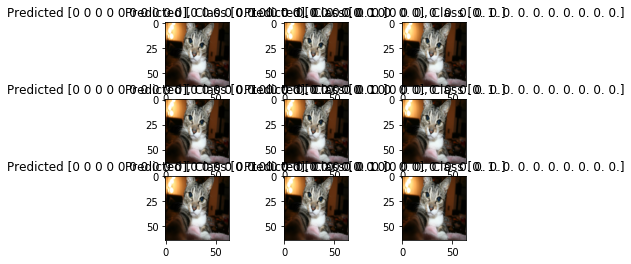

In [26]:
correct = np.where(predicted_classes==Y_test)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_set_x[correct].reshape(64,64,3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct]))
    plt.tight_layout()

Found 24 incorrect labels


/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  import sys


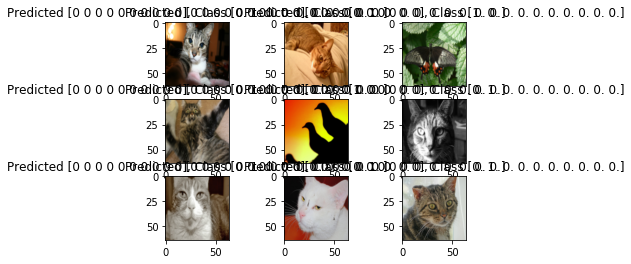

In [27]:
incorrect = np.where(predicted_classes!=Y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_set_x[incorrect].reshape(64,64,3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect]))
    plt.tight_layout()

In [28]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(Y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      0.09      0.17        11
     Class 1       0.00      0.00      0.00        14
     Class 2       0.00      0.00      0.00         0
     Class 3       0.00      0.00      0.00         0
     Class 4       0.00      0.00      0.00         0
     Class 5       0.00      0.00      0.00         0
     Class 6       0.00      0.00      0.00         0
     Class 7       0.00      0.00      0.00         0
     Class 8       0.00      0.00      0.00         0
     Class 9       0.00      0.00      0.00         0

   micro avg       1.00      0.04      0.08        25
   macro avg       0.10      0.01      0.02        25
weighted avg       0.44      0.04      0.07        25
 samples avg       0.04      0.04      0.04        25



/usr/local/anaconda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix_result = confusion_matrix(Y_test[], predicted_classes)

ValueError: multilabel-indicator is not supported